In [1]:
import os
from keras.models import load_model

model = load_model('oral_VGG19.h5')

In [39]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpmfcvo5ht\assets


INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpmfcvo5ht\assets


In [40]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [5]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 32ms/step
random.png
0
gigi calculus (Probability: 0.000)
1
gigi caries (Probability: 0.000)
2
gigi discoloration (Probability: 0.000)
3
gigi gingivitis (Probability: 1.000)
4
gigi hypodontia (Probability: 0.000)
5
gigi sehat (Probability: 0.000)
6
lidah fissure (Probability: 0.000)
7
lidah geografis (Probability: 0.000)
8
lidah kanker (Probability: 0.000)
9
lidah leukoplakia (Probability: 0.000)
10
lidah putih (Probability: 0.000)
11
lidah sehat (Probability: 0.000)


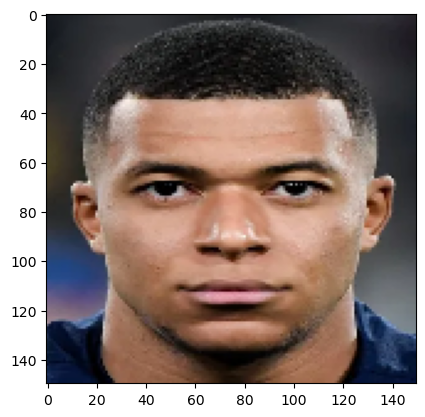

In [18]:
path = "random.png"
img = image.load_img(path, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
image_class = model.predict(images, batch_size=24)

print(path)

for i in range(len(classes)):    
    print(i)
    print(f'{classes[i]} (Probability: {image_class[0, i]:.3f})')
    # if image_class[0, i] > 0:
    #     print(f'{classes[i]} (Probability: {image_class[0, i]:.3f})')

if np.max(image_class) == 0:
    print('Not defined')